In [2]:
import numpy as np
import os
import pandas as pd

np.set_printoptions(suppress=True)

def read_all_csv(file_dir):
    #domain = os.path.abspath(file_dir)
    result = {}
    files = os.listdir(file_dir)
    files.sort()
    print(len(files))
    i = 0
    for info in files:
        if os.path.splitext(info)[1] == '.csv':
            info = os.path.join(file_dir, info) #将路径与文件名结合起来就是每个文件的完整路径  
            print(info)
            data = pd.read_csv(info)
            result[os.path.splitext(info)[0][5:]] = data
    return result

def time_acc(day, hour, minute, second):
    time = day * 86400 + hour * 3600 + minute * 60 + second
    return time

print("Reading files in dir...")
data = read_all_csv('data/')

Reading files in dir...
48
data/in1.csv
data/in13.csv
data/in17.csv
data/in3.csv
data/in7.csv
data/pn1.csv
data/pn2.csv
data/pn3.csv
data/pn4.csv
data/tj1.csv
data/tj10.csv
data/tj11.csv
data/tj12.csv
data/tj13.csv
data/tj14.csv
data/tj15.csv
data/tj16.csv
data/tj17.csv
data/tj18.csv
data/tj19.csv
data/tj2.csv
data/tj20.csv
data/tj21.csv
data/tj22.csv
data/tj23.csv
data/tj24.csv
data/tj25.csv
data/tj26.csv
data/tj27.csv
data/tj28.csv
data/tj3.csv
data/tj4.csv
data/tj5.csv
data/tj6.csv
data/tj7.csv
data/tj8.csv
data/tj9.csv
data/vn1.csv
data/vn5.csv
data/vn8.csv
data/zk118119.csv
data/zk126.csv
data/zk130.csv
data/zk20.csv
data/zk217.csv
data/zk218.csv
data/zk219.csv


In [ ]:
result = np.zeros((data['tj1'].shape[0], len(data) + 1))
debug_index = np.zeros((data['tj1'].shape[0], len(data)))

index = {}
index_range = {}
day = {}
hour = {}
# Record the minute will plus 1
hour_flag = {}

pre_moment = {}
current_moment = {}

for key in data:
    index[key] = 0
    day[key] = 0
    hour[key] = 0
    hour_flag[key] = 0
    pre_moment[key] = 0
    
    current_moment[key] = time_acc(0, 0, int(data[key].iloc[0, 0][0:2]), int(data[key].iloc[0, 0][3:5])) if key != 'tj1' else 0
    index_range[key] = len(data[key])


for i, time in enumerate(data['tj1']['Time']):
    
    if time[5] == '4':
        basic_day = int(time[7:9]) - 23
    elif time[5] == '5':
        basic_day = int(time[7]) + 7
    
    basic_hour = int(time[-8:-6])
    basic_minute = int(time[-5:-3])
    basic_second = int(time[-2:])
    
    basic_time = time_acc(basic_day, basic_hour, basic_minute, basic_second)
    
    if basic_time > 691200 and basic_time < 716702:
        result[i, -1] = 1
    elif basic_time > 777600 and basic_time < 861013:
        result[i, -1] = 1
    elif basic_time > 950403 and basic_time < 1473668:
        result[i, -1] = 1
    
    for j, key in enumerate(data):
        if key == 'tj1':
            index[key] += 1
            result[i, j] = data[key].iloc[i, 1]
            debug_index[i, j] = i
            
        else:
            while current_moment[key] < basic_time:
                index[key] += 1
                if index[key] >= index_range[key]:
                    break
                    
                minute = int(data[key].iloc[index[key], 0][0:2])
                second = int(data[key].iloc[index[key], 0][3:5])

                if minute > 50:
                    hour_flag[key] = 1
                if minute < 5 and hour_flag[key] == 1:
                    hour_flag[key] = 0
                    hour[key] += 1

                if hour[key] == 24:
                    hour[key] = 0
                    day[key] += 1
                
                pre_moment[key] = current_moment[key]
                current_moment[key] = time_acc(day[key], hour[key], minute, second)

            
            if index[key] >= index_range[key]:
                result[i, j] = data[key].iloc[index_range[key] - 1, 1]
                debug_index[i, j] = index_range[key]
            elif (basic_time - pre_moment[key]) < (current_moment[key] - basic_time):
                result[i, j] = data[key].iloc[max(0, index[key] - 1), 1]
                debug_index[i, j] = max(0, index[key] - 1)
            else:
                result[i, j] = data[key].iloc[index[key], 1]
                debug_index[i, j] = index[key]
                
    
    
#     if i == 30001:
#         break
        
    if i % 10000 == 0 and i > 0:
        for j, key in enumerate(index):
            if key == 'tj1':
                print(key, time, basic_time)
            else:
                print(key, data[key].iloc[int(debug_index[i, j]), 0], pre_moment[key], current_moment[key])
        print("The {0: 6d} group has complete.".format(i))
        print("-" * 30)

In [ ]:
import matplotlib.pyplot as plt

for i in range(result.shape[1]):
    plt.figure()
    plt.plot(range(result.shape[0]), result[:, i])
    plt.show()

In [ ]:
print(result.shape)

result = np.delete(result, [42, 46], axis= 1)
print(result.shape)

In [ ]:
for i in range(result.shape[1]):
    #plt.figure()
    #plt.plot(range(result.shape[0]), result[:, i])
    
    temp = np.unique(result[:, i])
    #plt.show()
    
    #print(temp.shape)
    
    if temp.shape[0] == 1:
        print(i)

In [ ]:
np.save("satellite_state.npy", result)

### Another two types of data pre-process

Only read them and transform them format into `.npy` format

In [9]:
# import pandas as pd
# data = pd.read_csv("data/Latest.csv")
# print(data)



In [12]:
data = np.loadtxt(open("data/Latest.csv","rb"), delimiter=",",skiprows=1)
print(data.shape)

np.save("data/latest.npy", data)

(685516, 46)
[[ 3.488200e+01  1.510000e-01  3.491200e+01 ...  4.416016e+03
   4.339844e+03  0.000000e+00]
 [ 3.488200e+01  1.510000e-01  3.491200e+01 ...  4.416016e+03
   4.339844e+03  0.000000e+00]
 [ 3.488200e+01  1.510000e-01  3.491200e+01 ...  4.414062e+03
   4.339844e+03  0.000000e+00]
 ...
 [ 3.488200e+01 -1.000000e-03  3.403900e+01 ...  4.914062e+03
   4.837891e+03  1.000000e+00]
 [ 3.488200e+01 -1.000000e-03  3.403900e+01 ...  4.914062e+03
   4.837891e+03  1.000000e+00]
 [ 3.488200e+01 -1.000000e-03  3.403900e+01 ...  4.914062e+03
   4.837891e+03  1.000000e+00]]


In [24]:
import pandas as pd
data = pd.read_csv("data/Box.csv")
print(type(data))
print(data['Time'])
print(data.shape)
data = data.drop(columns = ['Time'])
print(data.shape)
data = data.to_numpy()
np.save("data/box.npy", data)

<class 'pandas.core.frame.DataFrame'>
0        2017/4/23 0:00
1        2017/4/23 0:01
2        2017/4/23 0:02
3        2017/4/23 0:03
4        2017/4/23 0:04
              ...      
21594    2017/5/7 23:55
21595    2017/5/7 23:56
21596    2017/5/7 23:57
21597    2017/5/7 23:58
21598    2017/5/7 23:59
Name: Time, Length: 21599, dtype: object
(21599, 47)
(21599, 46)


# PCA

In [3]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

dataset = np.load('satellite_state.npy')
X = dataset[:, :-1]
y = dataset[-1]
x_train, x_test, y_train, y_test = train_test_split(
    dataset[:, :-1], dataset[:, -1], random_state=1)

pca = PCA(n_components=3)

pca.fit(x_train)

print(pca.explained_variance_ratio_)

[0.978279   0.01474943 0.00284194]


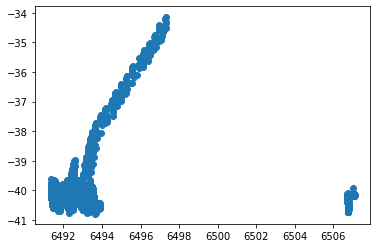

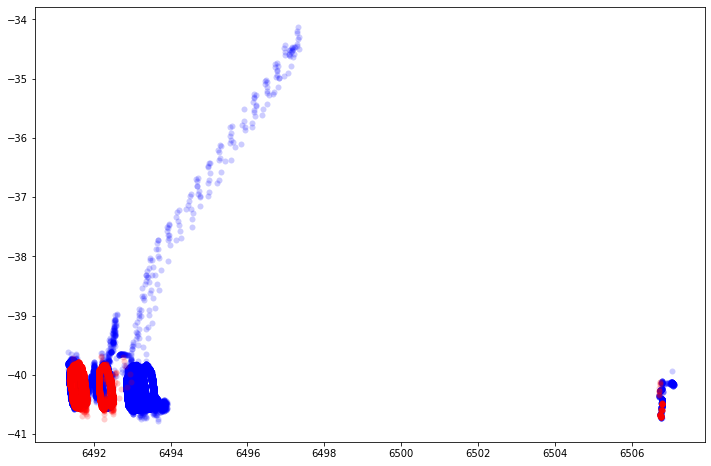

In [4]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

X_new = pca.transform(x_train)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

fig1 = plt.figure(1,figsize=(12,8))

colors = ['b','r','orange']
Label_Com = ['positive','negative']

for index in range(2):
    
    x_1 = X_new[y_train == index][:, 0]
    x_2 = X_new[y_train == index][:, 1]
    
    plt.scatter(x_1, x_2, c=colors[index], cmap='brg', alpha=0.2, marker='o', linewidth=0)  

plt.show()

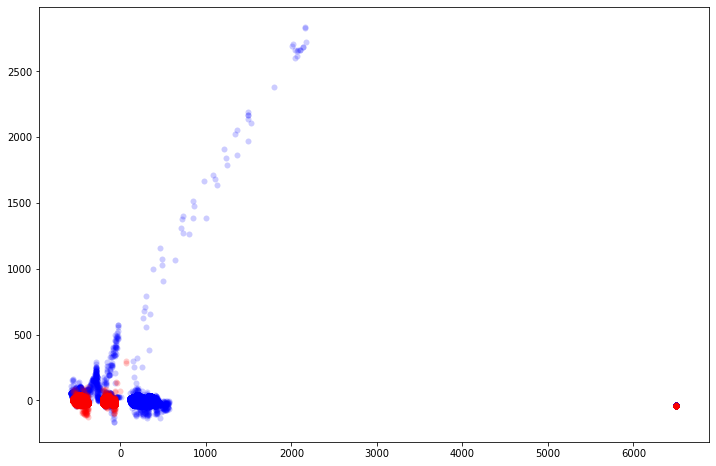

In [30]:
X_new = pca.transform(x_test)

fig1 = plt.figure(1,figsize=(12,8))

colors = ['b','r','orange']
Label_Com = ['positive','negative']

for index in range(2):
    
    x_1 = X_new[y_test == index][:, 0]
    x_2 = X_new[y_test== index][:, 1]
    
    plt.scatter(x_1, x_2, c=colors[index], cmap='brg', alpha=0.2, marker='o', linewidth=0)  

plt.show()

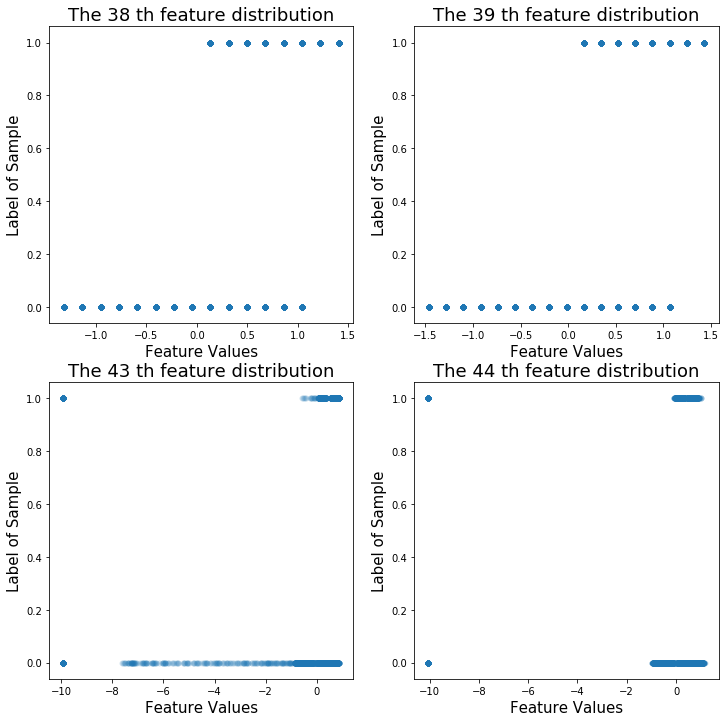

In [20]:
plt.figure(figsize=(12, 12))

for i, index in enumerate([38, 39, 43, 44]):
    plt.subplot(2, 2, i + 1)
    plt.scatter(x_train[:, index], y_train, cmap='brg', alpha=0.2, marker='o', linewidth=0)
    
    plt.xlabel('Feature Values', fontsize=15)
    plt.ylabel('Label of Sample', fontsize=15)
    #plt.ylim(0, 1, 1)
    plt.title('The {:2d} th feature distribution'.format(index), fontsize=18)
plt.savefig("feature_distribution.png")
plt.show()

[0.70944667 0.28179698]


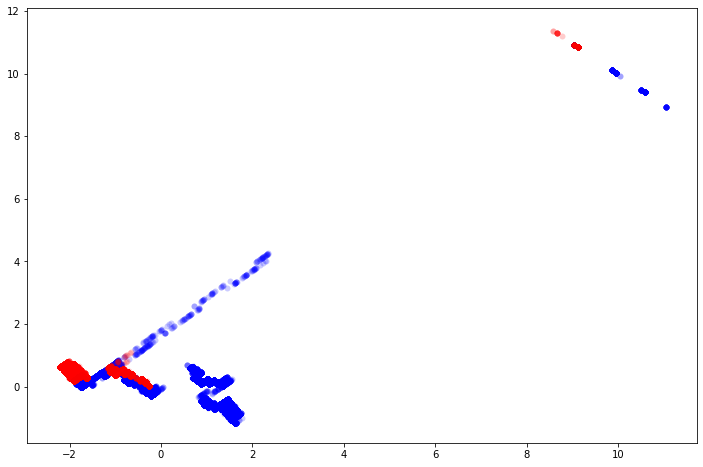

In [9]:
select_col = [38, 39, 43, 44]
x_new = x_train[:, select_col]

pca = PCA(n_components=2)
pca.fit(x_new)
print(pca.explained_variance_ratio_)
X_new = pca.transform(x_new)

fig1 = plt.figure(1,figsize=(12,8))

colors = ['b','r','orange']
Label_Com = ['positive','negative']

for index in range(2):
    
    x_1 = X_new[y_train == index][:, 0]
    x_2 = X_new[y_train == index][:, 1]
    
    plt.scatter(x_1, x_2, c=colors[index], cmap='brg', alpha=0.2, marker='o', linewidth=0)  

plt.show()

In [ ]:
select_col = [38, 39, 43, 44]
x_train = x_train[:, select_col]
x_test = x_test[:, select_col]